#  computer vision for quality inspection of casting product image

# Import the libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import  load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
pwd

'C:\\Users\\hp\\Desktop\\computer vision'

In [3]:
train_def = 'C:\\Users\\hp\\Desktop\\computer vision\\train\\def_front\\'
train_ok = 'C:\\Users\\hp\\Desktop\\computer vision\\train\\ok_front\\'

In [4]:
test_def = 'C:\\Users\\hp\\Desktop\\computer vision\\test\\def_front\\'
test_ok = 'C:\\Users\\hp\\Desktop\\computer vision\\test\\ok_front\\'

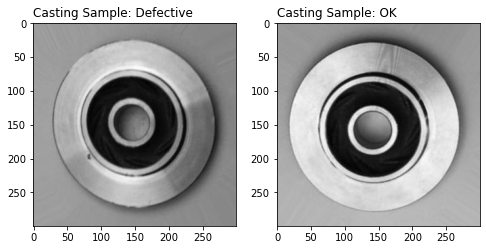

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sample_def = plt.imread(train_def+os.listdir(train_def)[0])
sample_ok = plt.imread(train_ok+os.listdir(train_ok)[0])
axes[0].imshow(sample_def)
axes[1].imshow(sample_ok)
axes[0].set_title('Casting Sample: Defective', loc='left')
axes[1].set_title('Casting Sample: OK', loc='left')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

In [6]:
len(os.listdir(train_def) )/(len(os.listdir(train_def))+ len(os.listdir(train_ok)))*100


56.65611337253128

In [7]:
len(os.listdir(train_ok) )/(len(os.listdir(train_def))+ len(os.listdir(train_ok)))*100

43.34388662746872

In [8]:
len(os.listdir(test_def) )/(len(os.listdir(test_def))+ len(os.listdir(test_ok)))*100

63.35664335664336

In [9]:
len(os.listdir(test_ok) )/(len(os.listdir(test_def))+ len(os.listdir(test_ok)))*100

36.64335664335665

In [10]:
tf.__version__

'2.6.0'

# Part 1 - Data Preprocessing/image augmentation

# Preprocessing the Training set

In [11]:
# apply image augmentation to prevent overfitting,this will produce new images,
#crate instance to the class imagedatagenerator, transfer the image to pixel 0-255,
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [12]:
training_set = train_datagen.flow_from_directory('C:\\Users\\hp\\Desktop\\computer vision\\train\\',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 6633 images belonging to 2 classes.


# Preprocessing the Testing set

In [13]:
# for test dataset we donot apply data augmentation, we just scal them
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('C:\\Users\\hp\\Desktop\\computer vision\\test\\',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

Found 715 images belonging to 2 classes.


In [14]:
training_set.class_indices

{'def_front': 0, 'ok_front': 1}

# Part 2 - Building the CNN

In [15]:
#create instance cnn from class sequential
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution

In [16]:
#apply filtter detector to convert image to feature map
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',input_shape=[64, 64, 3]))

# Step 2 - Pooling

In [17]:
#extract the max features from feature map
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening

In [19]:
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection

In [20]:
# now the flatten become the input and we add the hidden layer , here it should be fully connected,units is No.of neurons
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer

In [21]:
#build the output layer with one neoronse def or ok,sigmoid for binary classif &softmax 
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the CNN

# Compiling the CNN

In [22]:
# to update the weight and reduce the cost function use optimazer,
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set

In [23]:
# model.fit() does not return the Keras model, but a History object containing loss and metric values of your training
# we use verborse=1 to return bar per epoch, callbacks to save the model,savebestonly, save the model when it is the best
cnn.fit(x = training_set, validation_data = testing_set, epochs = 25, callbacks=ModelCheckpoint(
        'CNN_Casting_Inspection.hdf5',
        save_best_only=True,
        monitor='val_loss'),
    verbose=1)

Epoch 1/25
208/208 [==============================] - 28s 134ms/step - loss: 0.6530 - accuracy: 0.6151 - val_loss: 0.5525 - val_accuracy: 0.7455
Epoch 2/25
208/208 [==============================] - 32s 151ms/step - loss: 0.4825 - accuracy: 0.7668 - val_loss: 0.5726 - val_accuracy: 0.7007
Epoch 3/25
208/208 [==============================] - 32s 154ms/step - loss: 0.3631 - accuracy: 0.8411 - val_loss: 0.6546 - val_accuracy: 0.6867
Epoch 4/25
208/208 [==============================] - 32s 153ms/step - loss: 0.2816 - accuracy: 0.8829 - val_loss: 1.0048 - val_accuracy: 0.5972
Epoch 5/25
208/208 [==============================] - 29s 139ms/step - loss: 0.2169 - accuracy: 0.9141 - val_loss: 0.6647 - val_accuracy: 0.7385
Epoch 6/25
208/208 [==============================] - 30s 144ms/step - loss: 0.2167 - accuracy: 0.9142 - val_loss: 0.6137 - val_accuracy: 0.7245
Epoch 7/25
208/208 [==============================] - 30s 145ms/step - loss: 0.1772 - accuracy: 0.9350 - val_loss: 0.8075 - val_ac

print(classification_report(y_true, y_pred, digits=4))

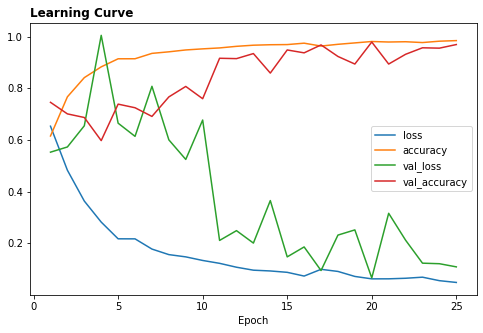

In [29]:
# Plot learning curve from model history
histo_dict = cnn.history.history
histo_df = pd.DataFrame(histo_dict, index=range(1,26))
fig, ax = plt.subplots(figsize=(8,5))
for m in histo_df.columns:
    ax.plot(histo_df.index, m, data=histo_df)
ax.set_xlabel('Epoch')
ax.set_title('Learning Curve', loc='left', weight='bold')
ax.legend()
plt.show()

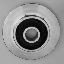

In [15]:
import numpy as np
from keras.preprocessing import image
model = load_model('./CNN_Casting_Inspection.hdf5')
test_image = image.load_img(test_def+os.listdir(test_def)[20], target_size = (64, 64))
test_image

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(train_def+os.listdir(train_def)[10], target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
training_set.class_indices
result = model.predict(test_image/255)

result

array([[0.00190437]], dtype=float32)

In [17]:
if result[0] >= 0.5:
  prediction = 'ok'
else:
  prediction = 'def'
print (prediction)

def


In [45]:
# for test dataset we donot apply data augmentation, we just scal them
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('C:\\Users\\hp\\Desktop\\computer vision\\test\\',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary',shuffle=False)

Found 715 images belonging to 2 classes.


In [46]:
pred=model.predict(testing_set)

In [47]:
testing_set.classes[testing_set.index_array]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
prediction=(pred>=0.5).reshape(-1,)
prediction

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(testing_set.classes,prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       453
           1       0.95      1.00      0.97       262

    accuracy                           0.98       715
   macro avg       0.97      0.98      0.98       715
weighted avg       0.98      0.98      0.98       715



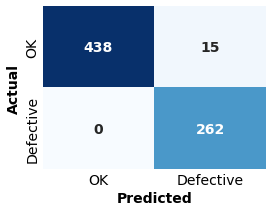

In [50]:
# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.heatmap(confusion_matrix(testing_set.classes,prediction), annot=True,
                 annot_kws={'size':14, 'weight':'bold'},
                 fmt='d', cbar=False, cmap='Blues')
ax.set_xticklabels(['OK', 'Defective'])
ax.set_yticklabels(['OK', 'Defective'], va='center')
plt.tick_params(axis='both', labelsize=14, length=0)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()